In [1]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
!pip install gensim
!pip install nltk
import nltk
import mglearn as mglearn
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


     |████████████████████████████████| 542kB 5.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f451ec54a25504b8548d2b6b8cc314bf9cf1c36b3b67e9e12235bab25988296f
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
os.chdir("/gdrive/My Drive/Colab Notebooks/Bottom Deeplearning/deep-learning-from-scratch-master/common")

from multi_layer_net_extend import MultiLayerNetExtend
from optimizer import SGD, Adam

os.chdir("/gdrive/My Drive/Colab Notebooks/Bottom Deeplearning/deep-learning-from-scratch-master/dataset")
from mnist import load_mnist



In [14]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:2000]
t_train = t_train[:2000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

np.random.seed(0)
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(10000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if ((i+1) % iter_per_epoch) == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt+1) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

__train(weight_init_std='he')


epoch:1 | 0.2355 - 0.3195
epoch:2 | 0.395 - 0.5435
epoch:3 | 0.519 - 0.6495
epoch:4 | 0.6015 - 0.7295
epoch:5 | 0.689 - 0.79
epoch:6 | 0.741 - 0.8245
epoch:7 | 0.7775 - 0.8485
epoch:8 | 0.8065 - 0.8715
epoch:9 | 0.8245 - 0.883
epoch:10 | 0.8265 - 0.896
epoch:11 | 0.861 - 0.9095
epoch:12 | 0.873 - 0.92
epoch:13 | 0.8755 - 0.927
epoch:14 | 0.888 - 0.934
epoch:15 | 0.894 - 0.941
epoch:16 | 0.8955 - 0.9475
epoch:17 | 0.9065 - 0.951
epoch:18 | 0.9085 - 0.9555
epoch:19 | 0.913 - 0.9585
epoch:20 | 0.9165 - 0.9625


([0.2355,
  0.395,
  0.519,
  0.6015,
  0.689,
  0.741,
  0.7775,
  0.8065,
  0.8245,
  0.8265,
  0.861,
  0.873,
  0.8755,
  0.888,
  0.894,
  0.8955,
  0.9065,
  0.9085,
  0.913,
  0.9165],
 [0.3195,
  0.5435,
  0.6495,
  0.7295,
  0.79,
  0.8245,
  0.8485,
  0.8715,
  0.883,
  0.896,
  0.9095,
  0.92,
  0.927,
  0.934,
  0.941,
  0.9475,
  0.951,
  0.9555,
  0.9585,
  0.9625])

In [23]:
# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

weight_scale_list

array([1.00000000e+00, 5.41169527e-01, 2.92864456e-01, 1.58489319e-01,
       8.57695899e-02, 4.64158883e-02, 2.51188643e-02, 1.35935639e-02,
       7.35642254e-03, 3.98107171e-03, 2.15443469e-03, 1.16591440e-03,
       6.30957344e-04, 3.41454887e-04, 1.84784980e-04, 1.00000000e-04])

============== 1/16 ==============


/gdrive/My Drive/Colab Notebooks/Bottom Deeplearning/deep-learning-from-scratch-master/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/gdrive/My Drive/Colab Notebooks/Bottom Deeplearning/deep-learning-from-scratch-master/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.11 - 0.087
epoch:2 | 0.11 - 0.108
epoch:3 | 0.11 - 0.1265
epoch:4 | 0.11 - 0.168
epoch:5 | 0.11 - 0.202
epoch:6 | 0.105 - 0.2295
epoch:7 | 0.105 - 0.2455
epoch:8 | 0.105 - 0.2725
epoch:9 | 0.11 - 0.3015
epoch:10 | 0.11 - 0.3155
epoch:11 | 0.11 - 0.325
epoch:12 | 0.11 - 0.353
epoch:13 | 0.11 - 0.3645
epoch:14 | 0.11 - 0.3835
epoch:15 | 0.11 - 0.399
epoch:16 | 0.11 - 0.4075
epoch:17 | 0.105 - 0.424
epoch:18 | 0.105 - 0.4425
epoch:19 | 0.105 - 0.4545


No handles with labels found to put in legend.


epoch:20 | 0.11 - 0.472
============== 2/16 ==============


../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.0955 - 0.1375
epoch:2 | 0.0955 - 0.164
epoch:3 | 0.0955 - 0.1845
epoch:4 | 0.0955 - 0.217
epoch:5 | 0.0955 - 0.2585
epoch:6 | 0.0955 - 0.2845
epoch:7 | 0.0955 - 0.3125
epoch:8 | 0.0955 - 0.3355
epoch:9 | 0.0955 - 0.376
epoch:10 | 0.0955 - 0.3935
epoch:11 | 0.0955 - 0.426
epoch:12 | 0.0955 - 0.452
epoch:13 | 0.0955 - 0.469
epoch:14 | 0.0955 - 0.4875
epoch:15 | 0.0955 - 0.5135
epoch:16 | 0.0955 - 0.5275
epoch:17 | 0.0955 - 0.5505
epoch:18 | 0.0955 - 0.5605
epoch:19 | 0.0955 - 0.5755


No handles with labels found to put in legend.


epoch:20 | 0.0955 - 0.591
============== 3/16 ==============
epoch:1 | 0.3955 - 0.1355
epoch:2 | 0.512 - 0.1915
epoch:3 | 0.6155 - 0.2555
epoch:4 | 0.674 - 0.3095
epoch:5 | 0.716 - 0.354
epoch:6 | 0.777 - 0.3975
epoch:7 | 0.7895 - 0.4355
epoch:8 | 0.828 - 0.4805
epoch:9 | 0.844 - 0.514
epoch:10 | 0.8805 - 0.5575
epoch:11 | 0.8985 - 0.578
epoch:12 | 0.9095 - 0.5925
epoch:13 | 0.926 - 0.6125
epoch:14 | 0.9355 - 0.635
epoch:15 | 0.942 - 0.6465
epoch:16 | 0.9525 - 0.6665
epoch:17 | 0.959 - 0.6815
epoch:18 | 0.965 - 0.703
epoch:19 | 0.9745 - 0.7245


No handles with labels found to put in legend.


epoch:20 | 0.975 - 0.7325
============== 4/16 ==============
epoch:1 | 0.2745 - 0.179
epoch:2 | 0.4855 - 0.312
epoch:3 | 0.5955 - 0.415
epoch:4 | 0.656 - 0.4755
epoch:5 | 0.706 - 0.5395
epoch:6 | 0.7395 - 0.5835
epoch:7 | 0.7645 - 0.6155
epoch:8 | 0.7825 - 0.65
epoch:9 | 0.8 - 0.688
epoch:10 | 0.8155 - 0.7155
epoch:11 | 0.826 - 0.7355
epoch:12 | 0.8405 - 0.75
epoch:13 | 0.852 - 0.7645
epoch:14 | 0.8615 - 0.78
epoch:15 | 0.8765 - 0.7935
epoch:16 | 0.8795 - 0.804
epoch:17 | 0.888 - 0.8185
epoch:18 | 0.893 - 0.8235
epoch:19 | 0.9025 - 0.8295


No handles with labels found to put in legend.


epoch:20 | 0.907 - 0.838
============== 5/16 ==============
epoch:1 | 0.0875 - 0.2005
epoch:2 | 0.1045 - 0.366
epoch:3 | 0.1275 - 0.4925
epoch:4 | 0.1485 - 0.569
epoch:5 | 0.181 - 0.628
epoch:6 | 0.207 - 0.6745
epoch:7 | 0.2255 - 0.715
epoch:8 | 0.2595 - 0.7495
epoch:9 | 0.279 - 0.7725
epoch:10 | 0.2925 - 0.7915
epoch:11 | 0.2955 - 0.8095
epoch:12 | 0.3085 - 0.8275
epoch:13 | 0.324 - 0.842
epoch:14 | 0.3295 - 0.8475
epoch:15 | 0.341 - 0.8595
epoch:16 | 0.319 - 0.877
epoch:17 | 0.327 - 0.881
epoch:18 | 0.3415 - 0.892
epoch:19 | 0.354 - 0.8995


No handles with labels found to put in legend.


epoch:20 | 0.354 - 0.9075
============== 6/16 ==============
epoch:1 | 0.112 - 0.396
epoch:2 | 0.0895 - 0.614
epoch:3 | 0.1415 - 0.698
epoch:4 | 0.1085 - 0.7635
epoch:5 | 0.107 - 0.8025
epoch:6 | 0.0965 - 0.829
epoch:7 | 0.11 - 0.8615
epoch:8 | 0.11 - 0.877
epoch:9 | 0.11 - 0.8935
epoch:10 | 0.112 - 0.9105
epoch:11 | 0.1325 - 0.922
epoch:12 | 0.11 - 0.9295
epoch:13 | 0.112 - 0.936
epoch:14 | 0.11 - 0.943
epoch:15 | 0.112 - 0.9495
epoch:16 | 0.1645 - 0.9565
epoch:17 | 0.172 - 0.9595
epoch:18 | 0.11 - 0.9665
epoch:19 | 0.11 - 0.97


No handles with labels found to put in legend.


epoch:20 | 0.11 - 0.9755
============== 7/16 ==============
epoch:1 | 0.099 - 0.4155
epoch:2 | 0.112 - 0.655
epoch:3 | 0.112 - 0.729
epoch:4 | 0.112 - 0.7805
epoch:5 | 0.112 - 0.846
epoch:6 | 0.112 - 0.904
epoch:7 | 0.112 - 0.9285
epoch:8 | 0.112 - 0.9475
epoch:9 | 0.112 - 0.9595
epoch:10 | 0.112 - 0.965
epoch:11 | 0.112 - 0.976
epoch:12 | 0.112 - 0.9775
epoch:13 | 0.112 - 0.983
epoch:14 | 0.112 - 0.9835
epoch:15 | 0.112 - 0.9865
epoch:16 | 0.112 - 0.9885
epoch:17 | 0.112 - 0.99
epoch:18 | 0.112 - 0.9915
epoch:19 | 0.112 - 0.9925


No handles with labels found to put in legend.


epoch:20 | 0.112 - 0.994
============== 8/16 ==============
epoch:1 | 0.112 - 0.6335
epoch:2 | 0.112 - 0.757
epoch:3 | 0.112 - 0.8425
epoch:4 | 0.112 - 0.884
epoch:5 | 0.112 - 0.943
epoch:6 | 0.112 - 0.9665
epoch:7 | 0.112 - 0.978
epoch:8 | 0.112 - 0.984
epoch:9 | 0.112 - 0.9885
epoch:10 | 0.112 - 0.994
epoch:11 | 0.112 - 0.9955
epoch:12 | 0.112 - 0.9975
epoch:13 | 0.112 - 0.9985
epoch:14 | 0.112 - 0.999
epoch:15 | 0.112 - 0.999
epoch:16 | 0.112 - 0.999
epoch:17 | 0.112 - 0.999
epoch:18 | 0.112 - 0.999
epoch:19 | 0.112 - 0.9995


No handles with labels found to put in legend.


epoch:20 | 0.112 - 0.9995
============== 9/16 ==============
epoch:1 | 0.11 - 0.643
epoch:2 | 0.11 - 0.7775
epoch:3 | 0.11 - 0.855
epoch:4 | 0.11 - 0.9445
epoch:5 | 0.11 - 0.968
epoch:6 | 0.11 - 0.981
epoch:7 | 0.11 - 0.987
epoch:8 | 0.11 - 0.987
epoch:9 | 0.11 - 0.988
epoch:10 | 0.11 - 0.991
epoch:11 | 0.112 - 0.994
epoch:12 | 0.11 - 0.9955
epoch:13 | 0.11 - 0.9955
epoch:14 | 0.11 - 0.997
epoch:15 | 0.11 - 0.9975
epoch:16 | 0.11 - 0.9985
epoch:17 | 0.11 - 0.999
epoch:18 | 0.11 - 0.999
epoch:19 | 0.11 - 0.999


No handles with labels found to put in legend.


epoch:20 | 0.11 - 0.999
============== 10/16 ==============
epoch:1 | 0.112 - 0.6405
epoch:2 | 0.112 - 0.717
epoch:3 | 0.11 - 0.8955
epoch:4 | 0.11 - 0.9405
epoch:5 | 0.11 - 0.953
epoch:6 | 0.112 - 0.966
epoch:7 | 0.11 - 0.971
epoch:8 | 0.11 - 0.9655
epoch:9 | 0.112 - 0.9895
epoch:10 | 0.112 - 0.988
epoch:11 | 0.112 - 0.9945
epoch:12 | 0.112 - 0.9955
epoch:13 | 0.112 - 0.9915
epoch:14 | 0.112 - 0.9965
epoch:15 | 0.112 - 0.994
epoch:16 | 0.112 - 0.9985
epoch:17 | 0.112 - 0.9985
epoch:18 | 0.112 - 0.9985
epoch:19 | 0.112 - 0.999


No handles with labels found to put in legend.


epoch:20 | 0.112 - 0.925
============== 11/16 ==============
epoch:1 | 0.11 - 0.6325
epoch:2 | 0.107 - 0.777
epoch:3 | 0.11 - 0.688
epoch:4 | 0.11 - 0.863
epoch:5 | 0.11 - 0.936
epoch:6 | 0.11 - 0.9475
epoch:7 | 0.107 - 0.9625
epoch:8 | 0.11 - 0.975
epoch:9 | 0.11 - 0.984
epoch:10 | 0.11 - 0.9805
epoch:11 | 0.11 - 0.9875
epoch:12 | 0.11 - 0.9865
epoch:13 | 0.11 - 0.988
epoch:14 | 0.11 - 0.9915
epoch:15 | 0.11 - 0.9615
epoch:16 | 0.11 - 0.9935
epoch:17 | 0.11 - 0.996
epoch:18 | 0.11 - 0.996
epoch:19 | 0.11 - 0.997


No handles with labels found to put in legend.


epoch:20 | 0.11 - 0.997
============== 12/16 ==============
epoch:1 | 0.11 - 0.604
epoch:2 | 0.11 - 0.766
epoch:3 | 0.11 - 0.7785
epoch:4 | 0.11 - 0.8295
epoch:5 | 0.11 - 0.7995
epoch:6 | 0.11 - 0.8805
epoch:7 | 0.11 - 0.8625
epoch:8 | 0.11 - 0.8855
epoch:9 | 0.11 - 0.891
epoch:10 | 0.11 - 0.89
epoch:11 | 0.11 - 0.888
epoch:12 | 0.11 - 0.894
epoch:13 | 0.11 - 0.891
epoch:14 | 0.11 - 0.867
epoch:15 | 0.11 - 0.883
epoch:16 | 0.11 - 0.8985
epoch:17 | 0.11 - 0.9015
epoch:18 | 0.11 - 0.9035
epoch:19 | 0.11 - 0.9


No handles with labels found to put in legend.


epoch:20 | 0.11 - 0.893
============== 13/16 ==============
epoch:1 | 0.0955 - 0.4275
epoch:2 | 0.11 - 0.479
epoch:3 | 0.11 - 0.546
epoch:4 | 0.112 - 0.5745
epoch:5 | 0.112 - 0.597
epoch:6 | 0.112 - 0.583
epoch:7 | 0.112 - 0.5825
epoch:8 | 0.112 - 0.5995
epoch:9 | 0.112 - 0.583
epoch:10 | 0.112 - 0.609
epoch:11 | 0.112 - 0.602
epoch:12 | 0.112 - 0.602
epoch:13 | 0.112 - 0.5655
epoch:14 | 0.112 - 0.6125
epoch:15 | 0.112 - 0.6255
epoch:16 | 0.112 - 0.5895
epoch:17 | 0.112 - 0.56
epoch:18 | 0.112 - 0.689
epoch:19 | 0.112 - 0.6755


No handles with labels found to put in legend.


epoch:20 | 0.112 - 0.694
============== 14/16 ==============
epoch:1 | 0.11 - 0.3885
epoch:2 | 0.11 - 0.444
epoch:3 | 0.11 - 0.4895
epoch:4 | 0.11 - 0.46
epoch:5 | 0.112 - 0.513
epoch:6 | 0.112 - 0.5085
epoch:7 | 0.112 - 0.4985
epoch:8 | 0.11 - 0.515
epoch:9 | 0.107 - 0.517
epoch:10 | 0.107 - 0.521
epoch:11 | 0.107 - 0.523
epoch:12 | 0.107 - 0.5315
epoch:13 | 0.11 - 0.526
epoch:14 | 0.11 - 0.5275
epoch:15 | 0.11 - 0.516
epoch:16 | 0.11 - 0.516
epoch:17 | 0.11 - 0.524
epoch:18 | 0.11 - 0.6175
epoch:19 | 0.11 - 0.5975


No handles with labels found to put in legend.


epoch:20 | 0.11 - 0.6205
============== 15/16 ==============
epoch:1 | 0.1 - 0.3715
epoch:2 | 0.1 - 0.3775
epoch:3 | 0.107 - 0.3885
epoch:4 | 0.107 - 0.4345
epoch:5 | 0.112 - 0.411
epoch:6 | 0.112 - 0.424
epoch:7 | 0.112 - 0.481
epoch:8 | 0.112 - 0.5475
epoch:9 | 0.112 - 0.537
epoch:10 | 0.112 - 0.6035
epoch:11 | 0.112 - 0.5735
epoch:12 | 0.112 - 0.6035
epoch:13 | 0.112 - 0.5505
epoch:14 | 0.112 - 0.6045
epoch:15 | 0.112 - 0.6105
epoch:16 | 0.112 - 0.615
epoch:17 | 0.112 - 0.618
epoch:18 | 0.112 - 0.609
epoch:19 | 0.112 - 0.618


No handles with labels found to put in legend.


epoch:20 | 0.112 - 0.5975
============== 16/16 ==============
epoch:1 | 0.11 - 0.3695
epoch:2 | 0.11 - 0.465
epoch:3 | 0.11 - 0.486
epoch:4 | 0.11 - 0.488
epoch:5 | 0.11 - 0.4935
epoch:6 | 0.11 - 0.5085
epoch:7 | 0.11 - 0.5045
epoch:8 | 0.11 - 0.513
epoch:9 | 0.11 - 0.504
epoch:10 | 0.11 - 0.517
epoch:11 | 0.11 - 0.5195
epoch:12 | 0.11 - 0.529
epoch:13 | 0.11 - 0.6145
epoch:14 | 0.11 - 0.5965
epoch:15 | 0.11 - 0.5425
epoch:16 | 0.11 - 0.5945
epoch:17 | 0.11 - 0.621
epoch:18 | 0.11 - 0.6185
epoch:19 | 0.11 - 0.618
epoch:20 | 0.11 - 0.6205


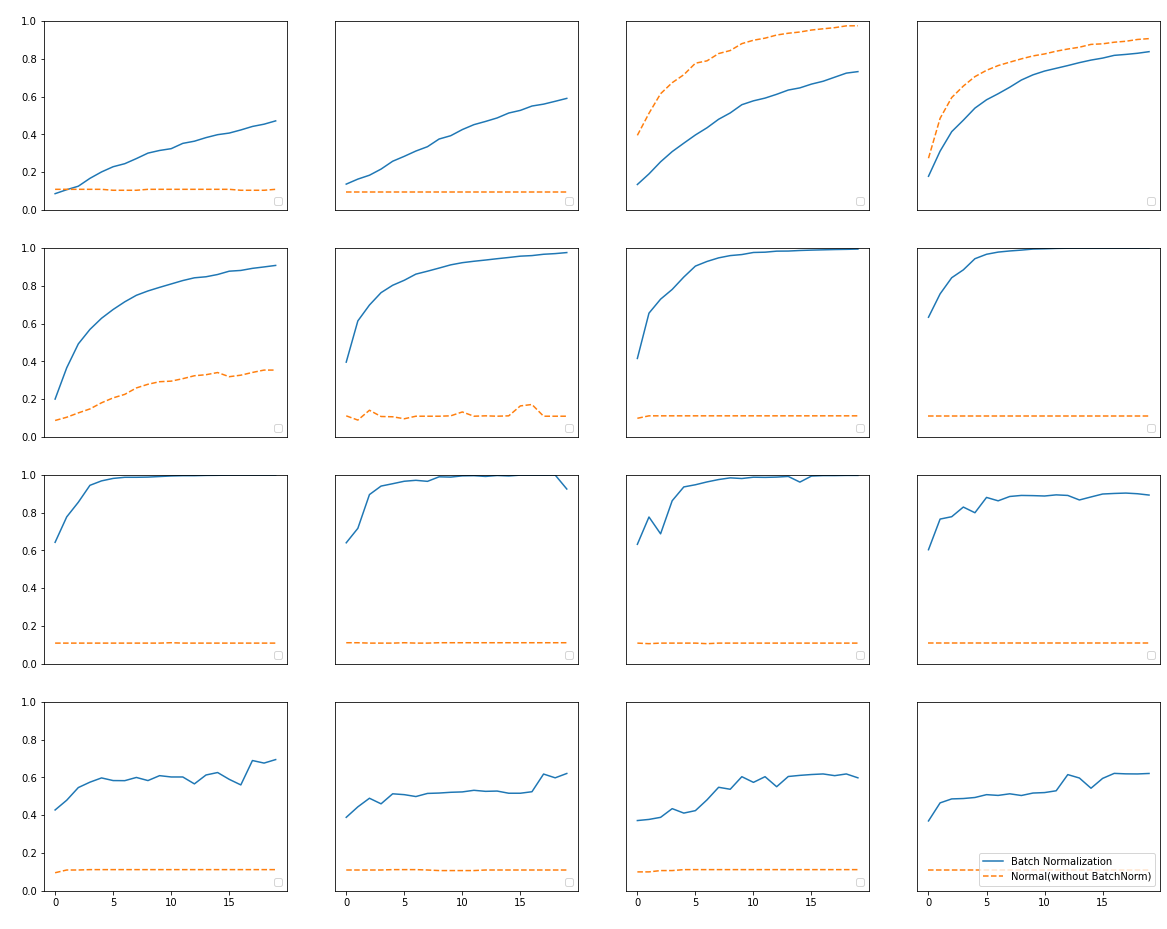

In [24]:
plt.figure(figsize=(20,16))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w),color='white',fontsize=10)
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy",color='white')
    if i < 12:
        plt.xticks([],color='white')
    else:
        plt.xlabel("epochs",color='white')
    plt.legend(loc='lower right')
    
plt.show()